## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv')

 ### 1) Linear Regression and Multiple Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
lm = LinearRegression()

In [5]:
X = df[["highway-mpg"]]

In [6]:
y = df['price']

In [7]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

<b>Intercept (a)<b/>

In [9]:
lm.intercept_

38423.3058581574

<b>Slope</b>

In [10]:
lm.coef_

array([-821.73337832])

Final Model:
<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg</b>

<h3> Multiple Linear Regression</h3>

In [11]:
z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [12]:
lm.fit(z,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<h5>Intercept</h5>

In [13]:
lm.intercept_

-15806.62462632922

<h5>Slope</h5>

In [14]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

###  2) Model evaluation using Visualization

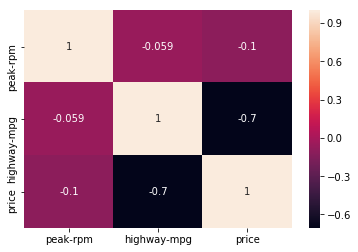

In [15]:
sns.heatmap(df[["peak-rpm","highway-mpg","price"]].corr(),annot=True)

#### Residual Plot


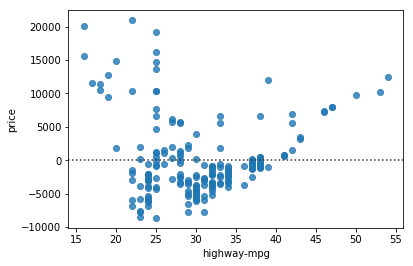

In [16]:

sns.residplot(df["highway-mpg"],df["price"])

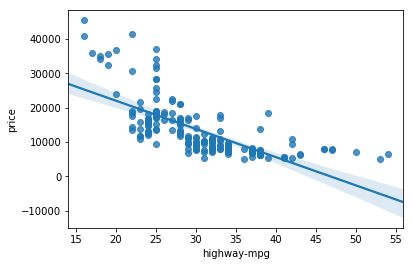

In [17]:
sns.regplot(df["highway-mpg"],df["price"])

### Multiple Lineal Regression

In [18]:
Yhat = lm.predict(z)


Text(0, 0.5, 'Proportion')

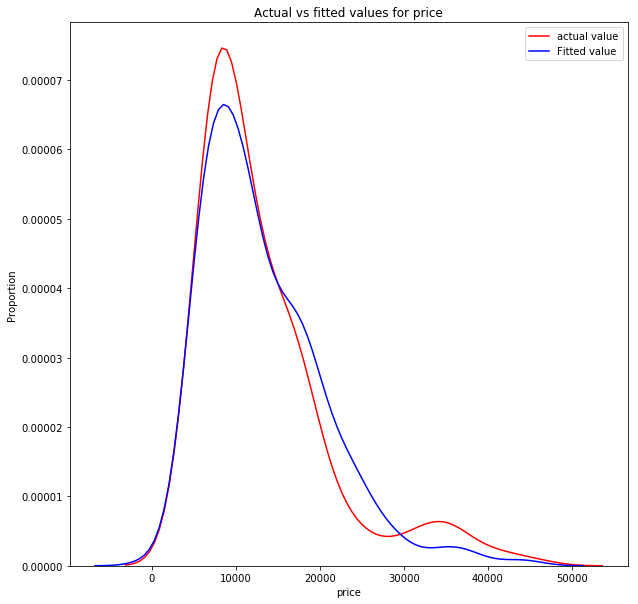

In [19]:
plt.figure(figsize=(10,10))
           
ax1 = sns.distplot(df['price'],color='r',hist=False,label='actual value')
sns.distplot(Yhat,color='b',hist=False,label='Fitted value')
plt.title("Actual vs fitted values for price")
plt.xlabel("price")
plt.ylabel("Proportion")


## 3) Polynomial Regression and Pipelines

In [52]:
x = df['highway-mpg']
y = df['price']

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [21]:
Input=[('Scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [22]:
pipe = Pipeline(Input)

In [23]:
pipe.fit(z,y)

/srv/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/srv/conda/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('Scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

## 4) Measures in-sample evaluation

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>

Lets Calculate de <b> R-square</b>

### Linear Regression

In [28]:
X = df[["engine-size"]]
y = df[['price']]

In [29]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
lm.score(X,y)

0.7609686443622008

Lets calculate <b> Mean_square_error </b>

In [31]:
Yhat2 = lm.predict(X)

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
mse = mean_squared_error(df["price"],Yhat2)

In [37]:
print(mse)

15021126.025174143


### Multivarite Linear regression

In [41]:
lm.fit(z,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<b> R Square error </b>

In [43]:
lm.score(z,y)

0.8093562806577457

<b> Mean Square error </b>

In [44]:
Yhat3 = lm.predict(z)

In [45]:
mean_squared_error(y,Yhat3)

11980366.87072649

### Polynomial Fit

let’s import the function <b>r2_score</b> from the module <b>metrics</b> as we are using a different function

<b>R Square</b>

from sklearn.metrics import r2_score

In [53]:
r_squared = r2_score(df[["price"]], p(x))

In [54]:
r_squared

0.674194666390652

<b>MSE</b>

In [56]:
mean_squared_error(df["price"],p(x))

20474146.426361218

<h3>Decision Making: Determining a Good Model Fit</h3>

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>


<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>